<a href="https://colab.research.google.com/github/elainedias16/TCC/blob/main/API_Comercial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## API Comercial

## Motivação

Os Large Language Models (LLMs) têm apresentado desempenhos notáveis em diversas tarefas, como resumo de textos, criação de conteúdo, correção gramatical, auxílio na criação de códigos,resposta a perguntas, entre outras tarefas. Devido a esses avanços, muitas empresas estão interessadas em utilizar LLMs para aumentar a eficiência operacional. No entanto, a criação e o treinamento de um modelo LLM exigem alta capacidade técnica, computacional e tempo. Por isso, muitas empresas optam por utilizar LLMs comerciais. Para uso geral, essas ferramentas podem ser acessadas diretamente através de navegadores. No entanto, para integrar LLMs comerciais com outras ferramentas e sistemas, é necessário a utilização de APIs, que permitem a conexão e a comunicação entre diferentes plataformas. Dessa forma, à medida que o uso de LLM comerciais no mercado de trabalho continua a crescer, aprender a utilizá-las por meio de APIs torna-se essencial.

## Resultados Esperados

Neste laboratório, espera-se que o aluno compreenda o funcionamento básico de um web service e a utilização de Application Programming Interface (APIs) para LLMs comerciais, como as desenvolvidas pelo Google, OpenAI e Meta. Será apresentado um exemplo de código demonstrando o uso da API do Google. Em seguida, o aluno realizará variações das atividades mostradas utilizando as APIs da OpenAI ou da Meta.

## Fundamentação teórica

Web services são componentes de software que permitem a interoperabilidade entre diferentes sitemas em uma rede, geralmente a internet. Essa interação é independente de hardware, software e linguagem de programação utilizados, o que torna os web services bastante versáteis e amplamente utilizados em diversos contextos.

Para facilitar a comunicação, é comum a criação de uma Interface de Programação de Aplicações (API), que padroniza o envio/recebimento de requisições/respostas entre o cliente e o servidor. As APIs costumam utilizar o protocolo de comunição HTTP (Hypertext Transfer Protocol), por ser o padrão na web, mas podem utilizar outros como o gRPC e WebSockets, entre outros. Além disso, os web services também podem adotar diversas arquiteturas, sendo as mais comuns, a arquitetura REST (Representational State Transfer) e SOAP (Simple Object Access Protocol).

A utilização de APIs permite o completo desacoplamento entre as aplicações. Por isso, ao utilizar um web service, o cliente não sabe como o serviço que está utilizando foi desenvolvido. Toda a comunicação ocorre por meio da API que fornece uma interface bem definida para as requisições do cliente e as respostas do servidor que hospeda o serviço, no caso o modelo de LLM. Para acessar a API, é necessário, primeiro criar uma chave de API, podendo esta ser paga ou não. Para o  caso das LLM, é comum que as empresas disponibilizem alguns modelos gratuitos ou que permitam um acesso gratuito por um determinado período. Via de regra, os modelos pagos costumam apresentar algumas vantagens como modelos mais avançados; um treinamento fino com dados do solicitante do serviço; personalização de resposta; menor latência, entre outros.

Ademais, é importante salientar que existem alguns riscos na utilização dos LLM. Nesse sentido, a organização OWASP elencou 10 ameaças na utilização desses modelos. [CITAR]
Desses riscos, vale salientar o Risco de Divulgação de Informações Confidenciais, o Risco de Manipulação Insegura do Output e o Risco de Dependência Excessiva.

Assim, a Divulgação de Informações Confidenciais diz respeito às LLM revelarem dados confidenciais em suas resposta, o que pode levar a acessos não autorizados, violando o príncipio de segurança da Confidencialidade. Dessa forma, no uso de LLM, tanto por meio do navegador quanto por meio de API, não devem ser fornecidos informações sensíveis.

Além disso, o Risco da Manipulação Insegura do Output discorre sobre o uso da resposta dos LLM sem o devido escrutínio. A verificação das repostas de LLM devem ser feitas, não apenas para a verificação da corretude da informação. Em casos de uso de API, em que a LLM é integrada a algum outro serviço, uma resposta de LLM sem verificação pode expor o backend da aplicação cliente, podendo levar a consequências como XSS, CSR e SSRF. Por isso, a verificação e higienização do output de LLMs deve ser feito.

Por último, o Risco de Dependência Excessiva discorre sobre quando as LLM produzem informação incorreta, mas que aparenta estar certa ao simular autoridade no assunto. Assim, sistemas ou pessoas que sejam bastante dependentes da LLM podem enfrentar desinformação e/ou problemas de segurança.


Portanto, o uso de LLM comerciais programaticamente ocorre através de web services e recomenda-se que as práticas de segurança do OWASPE sejam seguidas. Neste laboratório, será utilizada a API gratuita criada pelo Google que fornece o serviço de geração de texto do modelo **gemini-1.5-flash**. O Gemini foi escolhido pela facilidade do uso, por possuir uma grande janela de contexto e por ser o único modelo comercial atualmente que aceita o envio de imagens.






# Código

In [1]:
!pip install -U -q google-generativeai

In [2]:
import google.generativeai as genai
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('api_gemini')

genai.configure(api_key=GOOGLE_API_KEY)
model = genai.GenerativeModel('gemini-1.5-flash')

## Chat

In [ ]:
conversation_history = []

def talk(user_input):
  conversation_history.append({"role": "user", "content": user_input})

  all_content = ""
  for line in conversation_history:
    content = 'role: ' + line['role'] + '\ncontent: ' + line['content'] + '\n'
    all_content += content

  response = model.generate_content(all_content)
  conversation_history.append({"role": "Gemini", "content": response.text})

  print(f"Gemini: {response.text}")



while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        break
    talk(user_input)

You: Image that you're Jane Auster and give us a resume of your new book.
Gemini: ##  A Most Peculiar Proposition: A Novel 

**By Jane Austen**

**Synopsis:**

**A most peculiar proposition, indeed!**  When the eccentric and reclusive Miss Amelia Finch inherits her late aunt's sprawling estate, she finds herself entangled in a web of intrigue and romance.  The estate, Bleakworth Manor, is more than just a grand house - it houses a peculiar secret that has the potential to disrupt society's delicate balance.

**Enter Mr. Charles Blackwood, a handsome and enigmatic gentleman** whose pursuit of Amelia's hand is more than just a matter of social standing.  His interest in Bleakworth Manor, and its hidden secret, is clear, but his motives remain shrouded in mystery.  

**As Amelia navigates the complexities of her newfound wealth and position,** she finds herself caught between the expectations of society and her own desire for independence.  The arrival of her spirited cousin, Miss Eliza T

In [ ]:
text = "You are a pirate chatbot who always responds in pirate speak!Who are you?"
response = model.generate_content(text)
print(response.text)

Ahoy there, matey!  I be Captain Calico Jack, at yer service!  What be yer pleasure?  Shiver me timbers, I be ready for an adventure! 



In [ ]:
text = "Please, give me a image of a flower"
response = model.generate_content(text)
print(response.text)

I am unable to provide images as I am a text-based AI. However, I can suggest some places where you can find images of flowers:

* **Google Images:** Search for "flowers" and you'll find millions of images to choose from. 
* **Pinterest:** This platform is a treasure trove of beautiful images, including many flower photos.
* **Free image websites:** Unsplash, Pexels, Pixabay, and Flickr offer free high-quality images. 
* **Stock photo websites:** Shutterstock, Adobe Stock, and iStockphoto offer a wide selection of images, though some require a paid subscription. 

I hope this helps! 



In [ ]:
conditions = [
    "Does the text talk about sports?",
    "Does the text talk about politics?",
    "Does the text mention Lebron James?",
    "Does the text refers to a conflict in which israel is participating?",
    "The main point of the text is related to immigration?",
    "Does the text mentions the score of a match?",
]

texts = [
    "In the fifth game of the best-of-seven series, defending champions the Nuggets won a tense encounter 108-106. Jamal Murray scored 32 points, including the winner with just 3.6 seconds left when the scores were tied. James' 30 points and 11 assists were in vain for the Lakers. The NBA's all-time leading points scorer was chasing his fifth title and his first with the Lakers since 2020.",

    "In the Western Conference, the Oklahoma City Thunder also progressed to the last eight with a 97-89 win over the New Orleans Pelicans. Jalen Williams scored 24 points and Shai Gilgeous-Alexander added 24 with 10 rebounds to complete a 4-0 series clean sweep. The Thunder had a slender 44-43 advantage at half-time, before the Pelicans took a 80-75 lead but could not cling on as they struggled defensively.",

    "In the Eastern Conference, the Boston Celtics edged closer to the next round as they took a 3-1 advantage in their play-off series with the Miami Heat. They won the fourth match 102-88, but were dealt an injury concern as centre Kristaps Porzingis limped off the court with a calf strain shortly before half-time, and did not return. Derrick White's career-best 38 points helped the Celtics to victory, with the fifth match of the best-of-seven series taking place on Wednesday.",

    "The number of people claiming asylum in Ireland has risen, with the Irish government claiming 80 percent have arrived from Northern Ireland. It has blamed the Rwanda policy - the fear of deportation - for the increase, and wants to send migrants back to the UK. Ireland's deputy leader said the 80 percent figure was not 'data-based' but is standing by the claim. British Prime Minister Rishi Sunak says 'the deterrent is... already having an impact'.BBC Verify has been looking at the rise in asylum claims in the Irish Republic and whether the Rwanda scheme is behind it.",

    "The UK government has been urged not to deploy troops on the ground in Gaza to deliver aid, with one MP calling the idea 'completely insane'. The UK is understood to be considering tasking troops with driving trucks via an American-built floating pier onto a beach in Gaza. Ex-Immigration Minister Robert Jenrick said such a move would be 'unwise' and urged the government to rule it out. Defence Minister Leo Docherty said he would not comment on speculation.The US military is building a large floating causeway off the coast of Gaza to help deliver much-needed humanitarian aid to the area.",

    "MP says he was deported from Africa over China criticism. A Conservative MP says he was deported during a trip to Djibouti because of the east African country's close ties to China. Tim Loughton, the MP for East Worthing and Shoreham, said he was detained for more than seven hours and barred from entry to Djibouti earlier this month. Mr Loughton, who was subjected to sanctions by China in 2021, described the experience as “very lonely and frightening”. China's foreign office said the accusations were baseless. Mr Loughton was in Djibouti for a 24-hour visit, which included a meeting with the British ambassador."
]

for i in range(len(conditions)):
    t = texts[i]
    c = conditions[i]
    print("\n\n------------------")
    print(t)
    print("\n------------------")
    print(c)
    print("\n------------------")
    content = t + "\n\n" + c
    response = model.generate_content(content)
    print(response.text)
    print("\n\n------------------")


# print(len(texts))



------------------
In the fifth game of the best-of-seven series, defending champions the Nuggets won a tense encounter 108-106. Jamal Murray scored 32 points, including the winner with just 3.6 seconds left when the scores were tied. James' 30 points and 11 assists were in vain for the Lakers. The NBA's all-time leading points scorer was chasing his fifth title and his first with the Lakers since 2020.

------------------
Does the text talk about sports?

------------------
Yes, the text clearly talks about sports. It mentions a "best-of-seven series," "champions," "points," "assists," and a "title," all of which are terms associated with sports, specifically basketball in this case. 



------------------


------------------
In the Western Conference, the Oklahoma City Thunder also progressed to the last eight with a 97-89 win over the New Orleans Pelicans. Jalen Williams scored 24 points and Shai Gilgeous-Alexander added 24 with 10 rebounds to complete a 4-0 series clean sweep. T

## Code

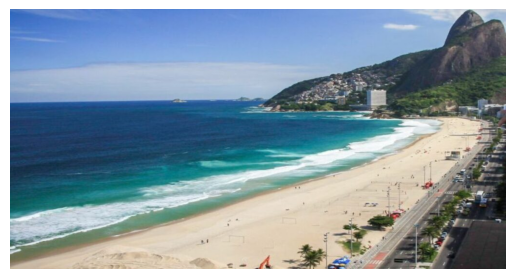

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Caminho para a imagem
path = "/content/sample_data/ipanema.png"

# Abre a imagem usando PIL
image = Image.open(path)

# Exibe a imagem usando matplotlib (recomendado para Jupyter/Colab)
plt.imshow(image)
plt.axis('off')  # Oculta os eixos
plt.show()

In [9]:
import PIL.Image


path = "/content/sample_data/ipanema.png"
# image = PIL.Image.open(path)
# image.show()

organ = PIL.Image.open(path)
response = model.generate_content(["Tell me about this image", organ])
print(response.text)

The image shows a beautiful beach scene with white sand, blue water, and lush green vegetation. The beach is lined with palm trees and buildings. In the distance, there is a large mountain rising up in the background. The sky is clear and blue. The image captures a picturesque and tranquil moment.  It appears to be a scene from the city of Rio de Janeiro in Brazil.


In [ ]:
response = model.generate_content('Please, give me python code to create a Factory Method design pattern')

if response.parts:
    print(response.text)
else:
    print('The model did not return any text')

```python
from abc import ABC, abstractmethod

class Shape(ABC):
    @abstractmethod
    def draw(self):
        pass

class Circle(Shape):
    def draw(self):
        print("Drawing a Circle")

class Square(Shape):
    def draw(self):
        print("Drawing a Square")

class ShapeFactory:
    @staticmethod
    def get_shape(shape_type):
        if shape_type == "CIRCLE":
            return Circle()
        elif shape_type == "SQUARE":
            return Square()
        else:
            return None

# Example usage
shape1 = ShapeFactory.get_shape("CIRCLE")
shape2 = ShapeFactory.get_shape("SQUARE")

shape1.draw()  # Output: Drawing a Circle
shape2.draw()  # Output: Drawing a Square
```

**Explanation:**

1. **Abstract Base Class (Shape):**
   - Defines the `draw()` method, which is common to all shapes but not implemented.
   - This ensures that any concrete shape class must provide its own implementation for drawing.

2. **Concrete Classes (Circle, Square):**
   - Inherit from the `S

In [12]:
model = genai.GenerativeModel("gemini-1.5-flash")
chat = model.start_chat(
    history=[
        {"role": "user", "parts": "Hello"},
        {"role": "model", "parts": "Great to meet you. What would you like to know?"},
    ]
)
response = chat.send_message("I have 2 dogs in my house.")
print(response.text)
response = chat.send_message("How many paws are in my house?")
print(response.text)

That's lovely!  Do you have any pictures of them?  What breeds are they?  I'm always happy to hear about people's furry companions. 🐶❤️ 

That's a tricky one! You have two dogs, and each dog has four paws, so that's 2 dogs * 4 paws/dog = 8 paws.

But, you also have two hands and two feet, so that's another 4 paws!  

So, there are a total of 8 dog paws + 4 human paws = **12 paws** in your house! 🐾



In [ ]:
from abc import ABC, abstractmethod

class Shape(ABC):
    @abstractmethod
    def draw(self):
        pass

class Circle(Shape):
    def draw(self):
        print("Drawing a Circle")

class Square(Shape):
    def draw(self):
        print("Drawing a Square")

class ShapeFactory:
    @staticmethod
    def get_shape(shape_type):
        if shape_type == "CIRCLE":
            return Circle()
        elif shape_type == "SQUARE":
            return Square()
        else:
            return None

# Example usage
shape1 = ShapeFactory.get_shape("CIRCLE")
shape2 = ShapeFactory.get_shape("SQUARE")

shape1.draw()  # Output: Drawing a Circle
shape2.draw()  # Output: Drawing a Square


Drawing a Circle
Drawing a Square


In [ ]:
response = model.generate_content('Now, please create another code, but creating an Prototype Design Pattern for vehicles in python')
print(response.text)

```python
class Vehicle:
    """Base vehicle prototype."""

    def __init__(self, model, color):
        self.model = model
        self.color = color

    def __str__(self):
        return f"Vehicle: {self.model} ({self.color})"

    def clone(self):
        """Return a copy of the vehicle."""
        return Vehicle(self.model, self.color)


class Car(Vehicle):
    """Car prototype."""

    def __init__(self, model, color, num_doors):
        super().__init__(model, color)
        self.num_doors = num_doors

    def __str__(self):
        return f"Car: {self.model} ({self.color}), {self.num_doors} doors"

    def clone(self):
        """Return a copy of the car."""
        return Car(self.model, self.color, self.num_doors)


class Motorcycle(Vehicle):
    """Motorcycle prototype."""

    def __init__(self, model, color, engine_size):
        super().__init__(model, color)
        self.engine_size = engine_size

    def __str__(self):
        return f"Motorcycle: {self.model} ({self.c

In [ ]:
class Vehicle:
    """Base vehicle prototype."""

    def __init__(self, model, color):
        self.model = model
        self.color = color

    def __str__(self):
        return f"Vehicle: {self.model} ({self.color})"

    def clone(self):
        """Return a copy of the vehicle."""
        return Vehicle(self.model, self.color)


class Car(Vehicle):
    """Car prototype."""

    def __init__(self, model, color, num_doors):
        super().__init__(model, color)
        self.num_doors = num_doors

    def __str__(self):
        return f"Car: {self.model} ({self.color}), {self.num_doors} doors"

    def clone(self):
        """Return a copy of the car."""
        return Car(self.model, self.color, self.num_doors)


class Motorcycle(Vehicle):
    """Motorcycle prototype."""

    def __init__(self, model, color, engine_size):
        super().__init__(model, color)
        self.engine_size = engine_size

    def __str__(self):
        return f"Motorcycle: {self.model} ({self.color}), {self.engine_size}cc engine"

    def clone(self):
        """Return a copy of the motorcycle."""
        return Motorcycle(self.model, self.color, self.engine_size)


# Example usage:
if __name__ == "__main__":
    # Create prototypes
    car_prototype = Car("Honda Civic", "Red", 4)
    motorcycle_prototype = Motorcycle("Harley Davidson", "Black", 1200)

    # Create copies of the prototypes
    car_1 = car_prototype.clone()
    car_2 = car_prototype.clone()
    motorcycle_1 = motorcycle_prototype.clone()

    # Modify the copies
    car_2.color = "Blue"
    motorcycle_1.engine_size = 1500

    # Print the vehicles
    print(car_1)  # Output: Car: Honda Civic (Red), 4 doors
    print(car_2)  # Output: Car: Honda Civic (Blue), 4 doors
    print(motorcycle_1)  # Output: Motorcycle: Harley Davidson (Black), 1500cc engine


Car: Honda Civic (Red), 4 doors
Car: Honda Civic (Blue), 4 doors
Motorcycle: Harley Davidson (Black), 1500cc engine


In [ ]:
response = model.generate_content('How can I join data frames in sql as I would do in R?')
print(response.text)

Let's explore how to join data frames in SQL, mirroring the functionality you'd find in R.

**Understanding SQL Joins**

SQL joins are the core mechanism for combining data from multiple tables (analogous to data frames in R).  Here's a breakdown of common join types:

* **INNER JOIN:** Returns rows only when there's a match in both tables based on the specified join condition.
* **LEFT JOIN:** Returns all rows from the "left" table, and matching rows from the "right" table. If no match is found in the "right" table, NULL values will be inserted for columns from that table.
* **RIGHT JOIN:**  Returns all rows from the "right" table, and matching rows from the "left" table. If no match is found in the "left" table, NULL values will be inserted for columns from that table.
* **FULL OUTER JOIN:** Returns all rows from both tables. If there's no match in one table, NULL values will be inserted for the columns from the other table.

**Examples: SQL vs. R**

Let's illustrate with examples, c

# Referencias

https://www.ibm.com/docs/en/cics-ts/5.1?topic=services-what-is-web-service


https://genai.owasp.org/